# Resumo
<p style='text-align: justify'> 
Este trabalho se propõe a analizar a Progressão da Epidemia da Doença Coronavírus (Covid-19) no Estado de Pernambuco. Para tanto foi usada a pesquisa bibliográfica para analisar o cenário atual, o quadro futuro e cenários hipotéticos, usando como fonte dados oficiais, e sistemas de equações diferenciais.
</p>



# Introdução
<p style='text-align: justify'> 
O presente trabalho procura analisar a progressão da pandemia do Covid-19 em pernambuco visando desse modo despertar a sociedade para os impactos causados por esta doença, para que assim no futuro a sociedade não cometa os mesmos erros do passado.

Na primeira parte do trabalho será analisado e apresentado os dados oficiais sobre a epidemia deste o começo desta em Pernambuco, e as devidas dificuldades para prever a progressão da doença a partir dos dados anteriores.

Na segunda parte será apresentado os métodos numéricos, equações usadas, e como foi feita a obtenção dos parametros para calibrar o modelo proposto.

Na terceira parte serão analisados a partir dos dias atuais, a evolução da doença durante o período de um ano a partir das informações obtidas na segunda parte, caso não haja mudanças drásticas no cenário pernambucano.

Na quarta parte serão analisados cenários hipotéticos que poderiam ocorrer no futuro, a importãncia das medidas de prevenção, a eficiência destas no combate a doença, e os impactos que o coronavirus teve na sociedade.
<p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#Permite que sejam abertas várias figuras simultaneamente
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
#Função padrão para melhor organização dos plots dos gráficos
def defaultPlot(fig,subplots,x,y,color,mainLabel,xLabel,yLabel,xStart,xEnd \
                ,xStep,yStart,yEnd,yStep):
  ax = fig.add_subplot(111, facecolor = '#dddddd', axisbelow = True)
  if subplots == 0:
    return
  elif subplots == 1:
    ax.plot(x, y, color, alpha = 0.5, lw =2, label= mainLabel)
  else:
    for i in range(subplots):
      ax.plot(x, y[i], color[i], alpha = 0.5, lw =2, label= mainLabel[i])
  ax.set_xlabel(xLabel)
  ax.set_ylabel(yLabel)
  ax.set_ylim(xStart,yEnd + yStep +1)
  ax.set_xlim(xEnd,xEnd +xStep +1)
  ax.yaxis.set_tick_params(length =0)
  ax.xaxis.set_tick_params(length = 0)
  ax.yaxis.set_ticks(np.arange(yStart, yEnd, yStep))
  ax.xaxis.set_ticks(np.arange(xStart, xEnd, xStep))
  ax.grid(True, linestyle = "-")
  ax.tick_params(labelcolor = 'k', labelsize = "small", width =3)
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ["top", "right", "bottom", "left"]:
      ax.spines[spine].set_visible(False)


In [3]:
#Função padrão para melhor organização dos plots dos gráficos
def defaultPlot2(x,y,title,xLabel,yLabel,xStart,xEnd,xStep):
    plt.plot(x,y)
    plt.scatter(x,y)
    plt.ylabel(yLabel)
    plt.xlabel(xLabel)
    plt.title(title)
    plt.xticks(np.arange(xStart, xEnd,xStep))
    plt.grid(True)

In [4]:
'''Intervalo  no qual a população no gráfico será dividida para melhor 
vizualização'''
tax = 1000

# A Evolução da Epidemia a Partir de Dados Oficiais

<p style='text-align: justify'> 
O instituto para Redução de Riscos e Desastres de Pernambuco (IRRD); Iniciativa federal que reuniu o GEOSERE-UFRPE e o LIKA-UFPE; possui o primeiro registro de dados referentes a doença coronavírus em Pernambuco no dia 24 de março de 2020, com 42 casos confirmados, zero recuperados e zero óbitos, e a partir desta data continuou a divulgar informes públicos diários sobre a progressão do Covid-19. Os gráficos abaixo são baseados nos dados fornecidos por estes informes do seguinte modo: os primeiros 20 dias tiveram os dados coletados dia a dia para a criação dos gráficos, a partir daí foram selecionados os dados de cada 10 dias até os 16 dias mais próximo ao dia 3 de novembro que tiveram amostras diárias de dados coletados.

Os gráficos possuem as informações referentes a 225 dias de progressão da doença (até o dia 3 de novembro de 2020), partindo do primeiro informe fornecido pelo IRRD.
</p>

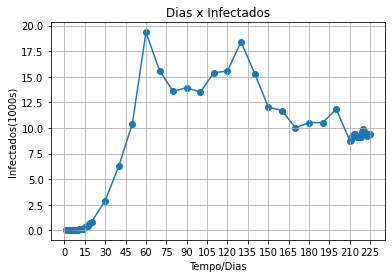

In [5]:
    #Número de dias a partir de 24 de março de 2020
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20\
         , 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170\
         , 180, 190, 200, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220\
         , 221, 222, 223, 224, 225]
    #Número de infectados a partir de 24 de março de 2020
    y = [42, 45, 45, 53, 63, 57, 58, 67, 73, 80, 109, 139, 155, 168, 286, 323\
         , 456, 575, 699, 829, 2911, 6268, 10423, 19342, 15593, 13572, 13935\
         , 13487, 15388, 15562, 18413, 15306, 12050, 11694, 10015, 10526, 10513\
         , 11838, 8770, 8836, 9173, 9426, 9374, 9137, 9125, 9079, 9105, 9561\
         , 9871, 9619, 9391, 9250, 9304, 9389]
    defaultPlot2(x,[n/tax for n in y ],"Dias x Infectados","Tempo/Dias"\
                 ,"Infectados(1000s)",0,226,15)
    plt.show()

<p style= "text-align: justify">
A partir do gráfico visualiza-se que o número de infectados começou com um crescimento exponencial até o segundo mês, quando o número começou a descer linearmente, até o dia 100 quando voltou a crescer. No dia 130 houve aparentemente um pico da doença e a partir daí teve a diminuição dos números de casos até se estabilizar no dia 210.

Como é possível verificar a partir do gráfico acima há uma grande dificuldade de montar um modelo ideal para a análise da progressão da epidemia, pelos seguintes motivos: o comportamento aparentemente caótico do vírus, impossibilidade de testar todas as pessoas e identificar todos os infectados, gerando possívelmente uma grande divergência com os dados reais e a dificuldade de saber quando a pessoa adquiriu o Coronavírus por causa do período de incubação.  
</p>

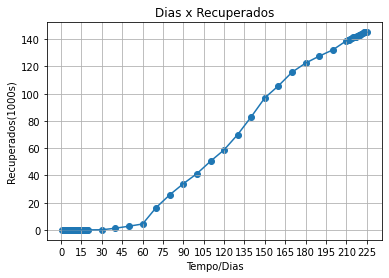

In [6]:
    #Número de dias a partir de 24 de março de 2020
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20\
         , 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170\
         , 180, 190, 200, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220\
         , 221, 222, 223, 224, 225]
    #Número de recuperados a parir de 24 de março de 2020
    y = [0, 0, 0, 0, 0, 11, 13, 14, 14, 17, 17, 23, 25, 25, 32, 32, 43, 44, 45\
         , 46, 105, 1249, 2729, 4361, 16432, 25789, 33944, 41324, 50426, 58790\
         , 70035, 83105, 97006, 105826, 115800, 122512, 127590, 132179, 138870\
         , 139453, 139726, 139824, 140591, 141541, 141700, 141833, 142674\
         , 143013, 143270, 144174, 144875, 145095, 145097, 145124]
    defaultPlot2(x,[n/tax for n in y ],"Dias x Recuperados","Tempo/Dias"\
                 ,"Recuperados(1000s)",0,226,15)
    plt.show()  

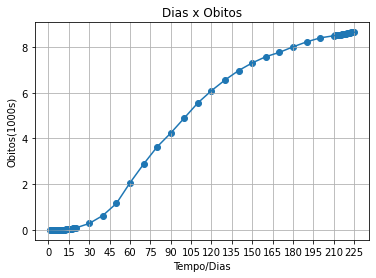

In [7]:
    #Número de dias a partir de 24 de março de 2020
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20\
         , 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170\
         , 180, 190, 200, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219\
         , 220, 221, 222, 223, 224, 225]
    #Número de óbitos a partir de 24 de março de 2020
    y = [0, 1, 3, 4, 5, 5, 6, 6, 8, 9, 10, 14, 21, 30, 34, 46, 56, 65, 72, 85\
         , 282, 628, 1157, 2057, 2875, 3633, 4234, 4894, 5556, 6089, 6557, 6970\
         , 7303, 7574, 7764, 8004, 8222, 8397, 8490, 8505, 8519, 8527, 8531\
         , 8542, 8552, 8564, 8575, 8587, 8599, 8609, 8627, 8632, 8638, 8643]
    defaultPlot2(x,[n/tax for n in y ],"Dias x Obitos","Tempo/Dias"\
                 ,"Obitos(1000s)",0,226,15)
    plt.show()  

<p style="text-align: justify"> 
A quantidade de óbitos e recuperados apresentam um formato menos caótico e mais estável (o número de recuperados possívelmente por causa do modo que a taxa de recuperação pode ser calculada, como será visto na próxima parte).
</p>

# Modelo de Análise Para Avaliar a Progressão da doença

<p style="text-align: justify">
O modelo usado para avaliar a progressão da doença neste projeto o SIRD. Este modelo pose der descrito através do seguinte sistema de equações diferenciais. 
</p>

  $$
  \frac{dS}{dt} = - \beta IS/N 
  $$
  $$
  \frac{dE}{dt} =  \beta IS/N - \sigma E
  $$
  $$
  \frac{dI}{dt} = \sigma E - \gamma I - \omega I
  $$
  $$
  \frac{dR}{dt} = \gamma I
  $$
  $$
  \frac{dD}{dt} = \omega I
  $$

S = A população que não é imune a doença.

E = Expostos, possuem o vírus mas não transmitem, pois estão no periodo de incubação da doença.

I = Infectados, possuem o vírus e podem transmitir a doença

R = Recuperados, Não possuem mais o vírus e ganharam imunidade permanente

D = Mortos (Deceased em inglês)

In [8]:
def deriv(y,t,N,beta,sigma,gamma,omega):
    S,E,I,R,D=y
    dSdt = -beta*S*I/N
    dEdt = beta*S*I/N - sigma*E 
    dIdt = sigma*E - gamma*I - omega*I
    dRdt = gamma*I 
    dDdt = omega*I
    return dSdt, dEdt, dIdt, dRdt, dDdt


<p style="text-align: justify"> 
Porém podemos deixar este modelo mais completo substituindo os valores de $\beta$, $\sigma$, $\gamma$ e $\omega$ do seguinte modo:
</p>

$\beta = \frac{R_{t}}{T_{inf}}$ = *taxa de exposição*

$\sigma = \frac{1}{T_{inc}}$ = *taxa de infecção*

$\gamma = \frac{1}{T_{inf}}$ = *taxa de recuperação*

$\omega = T_{m}$ = *taxa de mortalidade*

$N$:  *População Total*

$R_{t} =$ *Número reprodutivo básico ajustado*

$T_{inf} =$ *Tempo em dias que o paciente é infeccioso*

$T_{inc} =$ *Tempo de Incubação em dias*

$T_{m} =$ *Taxa de mortalidade*

<p style="text-align: justify"> 
A partir dos valores acima temos o seguinte sistema de equações que será usado no projeto:
</p>

  $$
  \frac{dS}{dt} = - \frac{\mathcal{R}_t}{T_{inf}} IS/N 
  $$
  $$
  \frac{dE}{dt} =  \frac{\mathcal{R}_t}{T_{inf}} IS/N - T_{inc}^{-1} E
  $$
  $$
  \frac{dI}{dt} = T_{inc}^{-1} E - T_{inf}^{-1} I - T_{m}I
  $$
  $$
  \frac{dR}{dt} = T_{inf}^{-1} I 
  $$
  $$
  \frac{dD}{dt} = T_{m}I
  $$

<p style="text-align: justify">
Porém mesmo sendo um modelo mais completo do que o SIR (S = Suscetiveis, I = Infectados, R = Recuperados/Removidos), ainda assim é uma versão simplificada da realidade, pois apresenta os seguintes problemas:
</p>

 * Não leva em conta a quantidade nascimentos e mortes naturais (O que para uma epidemia curta, pode ser ignorado)

 * Considera que os Expostos não podem transmitir a doença (O que para o coronavírus não é verdade)

 * Considera que uma vez infectado a doença, a pessoa recuperada se torna permanentemente imune (Há casos confirmados de pessoas que que foram infectadas com o corona vírus mais de uma vez)

 * Não considera que a gravidade da doença pode ser diferente de pessoa para pessoa (Pode haver pessoas assintomáticas durante todo o período de infecção, e existem casos graves)

 * Não considera que o $R_{t}$ possa variar com o tempo (Sendo que o $R_{t}$ geralmente varia.)



<p style="text-align: justify"> 
Os valores base para a calibração do modelo foram obtidos de diversas fontes:
</p>

* $R_t$ : Covid-19 Analytics
* $T_{inc}$, e $T_{inf}$: OPAS (Organização Pan-Americana da Saúde), WHO (World Health Organization) e o Ministério da Saúde
* $Casos, Recuperados, Óbitos$ *e* $T_m$: IRRD (Instituto para a Redução de Riscos e Desastres)

* $N$: IBGE (Instituto Brasileiro de Geografia e Estátistica)


<p style="text-align: justify"> 
Os valores das constantes são referentes ao dia 3 de novembro de 2020:
</p>

$N = $ *9,6 Milhões*

$R_t =$  *0,94*

$T_{inc} =$ *5 dias*

$T_{inf} =$ *14 dias*



$casos =$ 163156 

$recuperados =$ 145124 

$obitos =$ 8643 

$D_{0}$ = *obitos*

$R_{0} = $ *recuperados*

$I_{0} = $ *casos - recuperados - obitos*

$E_{0}$ = 0 (Não há dados suficientes para determinar a quantidade de expostos inicialmente)

$S_{0} = N - E_0 - I_0 - R_0 - D_0$  


In [9]:
casos = 163156 #Números de Casos Confirmados no dia 3/11
recuperados =145124 #Número de recuperados no dia 3/11
obitos = 8643 #Número de óbitos no dia 3/11
#years = 1
days = 365 #Um ano
tax = 1000
N = 9.6*(10**6) #População de pernambuco em 2020
E0 = 0
""" Os casos confirmados, são o número de casos desde o começo da pandemia, 
ou seja precisamos subtrair o número de recuperados e de obitos para o modelo 
funcionar corretamente"""
I0 = casos - recuperados - obitos 
R0 = recuperados #Números de recuperados iniciais
D0 = obitos #Números de óbitos iniciais
S0 = N-E0-I0-R0-D0 #Número de pessoas sucetiveis inicialmente

maxY = 10001
maxX = days + 10

In [10]:
Rt = 0.94 #Número Reprodutivo básico ajustado em Pernambuco
Tinc = 5 # Tempo de incubação da doença
Tinf = 14 #Tempo que a pessoa passa infectada
Tm = 3/100 #Taxa de mortalidade no Brasil


In [11]:
beta = Rt/Tinf
sigma = 1/Tinc
gamma = 1/Tinf 
omega = Tm   

In [12]:
t = np.linspace(0,int(days),int(days))

<p style="text-align: justify">
Para resolver o sistema de equações diferenciais, foi utilizado a função odeint do módulo scipy.integrate, que implementa métodos como Runge-Kutta de quarta ordem e o método de Euler. 
</p>


In [13]:
y0 = S0,E0,I0,R0,D0
ret = odeint(deriv,y0,t,args = (N,beta,sigma,gamma,omega))
S,E,I,R,D = ret.T

# Evolução da Doença no Periodo de um Ano a Partir do Dia 3 de Março de 2020

In [14]:
startX, endX = 0, maxX
stepSizeX = 30 
startY, endY = 0, maxY
stepSizeY = 1000

<p style="text-align: justify"> 
Usando os dados adquiridos na etapa anterior, foram plotados os gráficos abaixo referente a progressão da epidemia em Pernambuco.
</p>

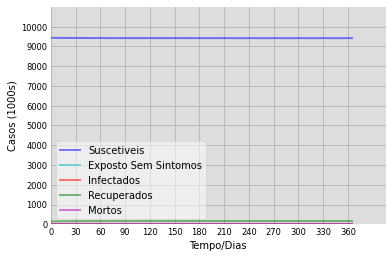

In [15]:
#Ajuste dos dados para plotar o gráfico
fig = plt.figure(facecolor = 'w')
SList = [n/tax for n in S]
EList = [n/tax for n in E]
IList = [n/tax for n in I]
RList = [n/tax for n in R]
DList = [n/tax for n in D]
colors = ['b','c','r','g','m']
labels = ["Suscetiveis","Exposto Sem Sintomos","Infectados","Recuperados"\
          ,"Mortos"]
defaultPlot(fig,5,t,[SList,EList,IList,RList,DList],colors,labels,"Tempo/Dias"\
            ,"Casos (1000s)",startX,endX,stepSizeX,startY,endY,stepSizeY)
plt.show()


<p style="text-align: justify">
Como a quantidade de casos é "pequena" comparada com o número total da população não é possível analisar os dados obtidos no gráfico acima, porém podemos dividir os gráficos dos Expostos, Infectados, Recuperados e Mortos e amplia-los, como feito abaixo, para a melhor vizualização dos dados.
</p>

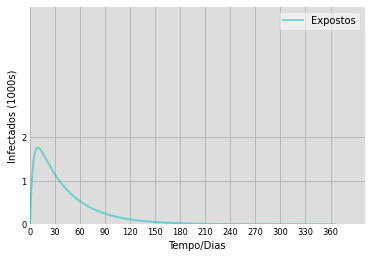

In [16]:
figE = plt.figure(facecolor = 'w')
defaultPlot(figE,1,t,E/tax,'c',"Expostos","Tempo/Dias","Infectados (1000s)"\
            ,0,370,30,0,3,1)
plt.show()

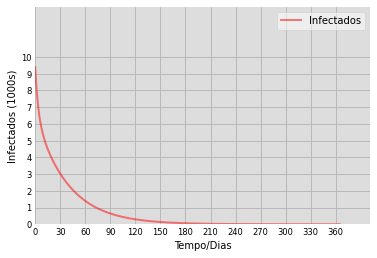

In [17]:
figI = plt.figure(facecolor = 'w')
defaultPlot(figI,1,t,I/tax,'r',"Infectados","Tempo/Dias","Infectados (1000s)"\
            ,0,370,30,0,11,1)
plt.show()

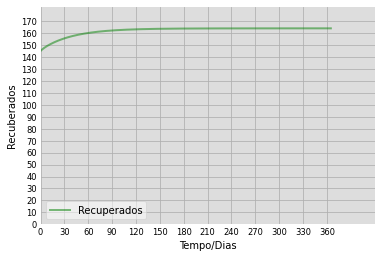

In [18]:
figR = plt.figure(facecolor = 'w')
defaultPlot(figR,1,t,R/tax,'g',"Recuperados","Tempo/Dias","Recuberados"\
            ,0,390,30,0,171,10)
plt.show()

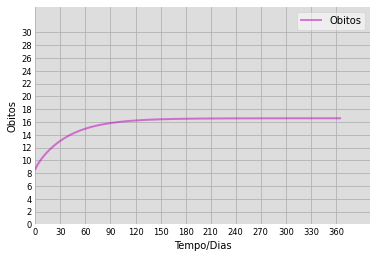

In [19]:
figD = plt.figure(facecolor = 'w')
defaultPlot(figD,1,t,D/tax,'m',"Obitos","Tempo/Dias","Obitos"\
            ,0,370,30,0,31,2)
plt.show()

<p style="text-align: justify">
A partir dos dados obtidos temos que o número de infectados tenderiam a decrescer, sendo que em 5 meses o número de infectados chegaria a zero. O número de mortos começaria a atingir o estado estacionário em 3 meses,chegando a um valor máximo próximo a 16 mil óbitos. Somando os números de óbitos e de recuperados, temos que a pandemia se encerraria com aproximadamente 200 mil casos confirmados, ou seja em torno de 2 por cento da população teriam sido infectadas com o corona vírus em algum momento.
</p>

# Cenários Hipotéticos

<p style="text-align: justify">
Por causa do comportamento caótico do vírus, e das possíveis medidas que ainda podem ser  tomadas pelo governo (e.g: volta as aulas, abertura de praias, distanciamento social, lockdown, testes em massa, etc...),  é impossível prever se a epidemia tomará o rumo previsto na parte anterior. 

Como valor do número reprodutivo básico ajustado ($R_t$) está abaixo de um (ou seja em média cada pessoa infecta menos do que uma pessoa durante o periodo de infecção da doença), porém bem próximo de um (0,94), ainda há o perigo deste valor subir, e a quantidade de casos da doença voltar a crescer, o que invalidaria o modelo. Mutações do vírus poderiam alterar o Tempo de incubação ($T_{inc}$), Tempo de Infecção ($T_{inf}$) e a taxa de mortalidade ($T_{m}$), também tornando o modelo imprecisos.

Partindo das suposições acima seria útil avaliar alguns cenários hipotéticos que ocorreriam a partir de mudanças do valores iniciais.
</p>

## Segunda Onda da Epidemia (Aumento na taxa de infecção)

<p style="text-align: justify">
Uma nova onda da epidemia poderia ocorrer por diversos motivos (e.g: mutação do vírus, mudança de temperatura, diminuição na rigidez das medidas tomadas pelo governo, etc..). Para simular este cenário, basta alterar o valor do número reprodutivo básico ajustado ($R_t$) para um valor acima de um. Para melhor visualização dos efeitos irei escolher $Rt=2$, ou seja, cada pessoa durante o periodo que estivesse infectada, passaria a doença para mais duas pessoas.
</p>

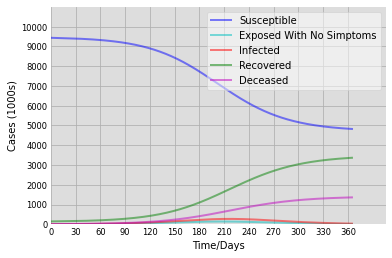

In [20]:
Rt = 2
beta = Rt/Tinf
ret = odeint(deriv,y0,t,args = (N,beta,sigma,gamma,omega))
S,E,I,R,D = ret.T

#Ajuste dos dados para plotar o gráfico
fig2 = plt.figure(facecolor = 'w')
SList = [n/tax for n in S]
EList = [n/tax for n in E]
IList = [n/tax for n in I]
RList = [n/tax for n in R]
DList = [n/tax for n in D]
colors = ['b','c','r','g','m']
labels = ["Susceptible","Exposed With No Simptoms","Infected","Recovered"\
          ,"Deceased"]
defaultPlot(fig2,5,t,[SList,EList,IList,RList,DList],colors,labels,"Time/Days"\
            ,"Cases (1000s)",startX,endX,stepSizeX,startY,endY,stepSizeY)
plt.show()


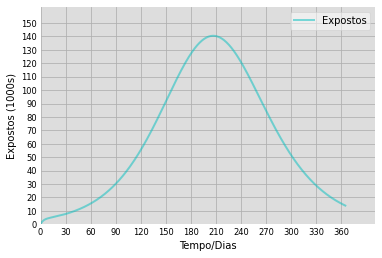

In [21]:
figE2 = plt.figure(facecolor = 'w')
defaultPlot(figE2,1,t,E/tax,'c',"Expostos","Tempo/Dias","Expostos (1000s)"\
            ,0,370,30,0,151,10)
plt.show()

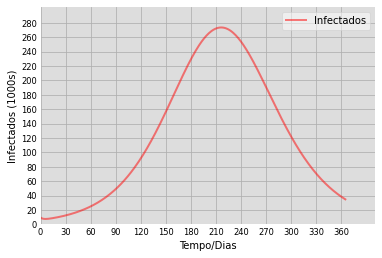

In [22]:
figI2 = plt.figure(facecolor = 'w')
defaultPlot(figI2,1,t,I/tax,'r',"Infectados","Tempo/Dias","Infectados (1000s)"\
            ,0,370,30,0,281,20)
plt.show()

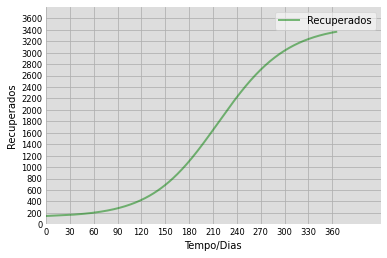

In [23]:
figR2 = plt.figure(facecolor = 'w')
defaultPlot(figR2,1,t,R/tax,'g',"Recuperados","Tempo/Dias","Recuperados"\
            ,0,390,30,0,3601,200)
plt.show()

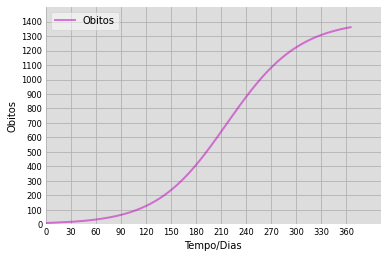

In [24]:
figD2 = plt.figure(facecolor = 'w')
defaultPlot(figD2,1,t,D/tax,'m',"Obitos","Tempo/Dias","Obitos"\
            ,0,370,30,0,1401,100)
plt.show()

<p style="text-align: justify">
O aumento na taxa de infecção fez os números subirem de formas alarmantes, o pico da pandemia foi atingido com 280 mil infectados e o número de mortos subiu para  1,4 milhões, ou seja 15% da população pernambucana de mortos, e este número poderia ser ainda maior pois a taxa de mortalidade subiria com a lotação dos hospitais. A epidemia se encerraria com um valor em  torno se 4,8 milhões de infectados totais (número de óbitos mais  o número de recuperados).
</p>

## Vacinação

<p style="text-align: justify">
Para simular o cenário de vacinação basta subtrair do número de vacinados de $\frac{dS}{dt}$. No cenário abaixo irei supor que a cada dia 100 mil pessoas são vacinadas, e que o $R_t$ é o mesmo do cenário anterior.
</p>

Assume-se as seguintes simplificações:

* Todas as pessoas vacinadas ficam imunes para sempre
* Só é necessário tomar uma dose da vacina

In [25]:
def deriv2(y,t,N,beta,sigma,gamma,omega):
    S,E,I,R,D=y
    dSdt = -beta*S*I/N - 10**4
    dEdt = beta*S*I/N - sigma*E 
    dIdt = sigma*E - gamma*I - omega*I
    dRdt = gamma*I 
    dDdt = omega*I
    return dSdt, dEdt, dIdt, dRdt, dDdt


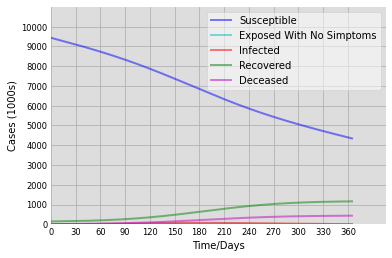

In [26]:
ret = odeint(deriv2,y0,t,args = (N,beta,sigma,gamma,omega))
S,E,I,R,D = ret.T

#Ajuste dos dados para plotar o gráfico
fig3 = plt.figure(facecolor = 'w')
SList = [n/tax for n in S]
EList = [n/tax for n in E]
IList = [n/tax for n in I]
RList = [n/tax for n in R]
DList = [n/tax for n in D]
colors = ['b','c','r','g','m']
labels = ["Susceptible","Exposed With No Simptoms","Infected","Recovered"\
          ,"Deceased"]
defaultPlot(fig3,5,t,[SList,EList,IList,RList,DList],colors,labels,"Time/Days"\
            ,"Cases (1000s)",startX,endX,stepSizeX,startY,endY,stepSizeY)
plt.show()


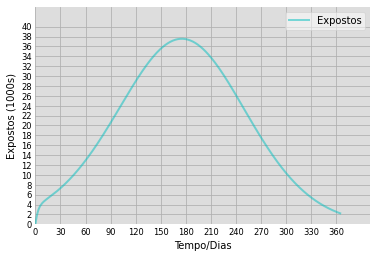

In [27]:
figE3 = plt.figure(facecolor = 'w')
defaultPlot(figE3,1,t,E/tax,'c',"Expostos","Tempo/Dias","Expostos (1000s)"\
            ,0,370,30,0,41,2)
plt.show()

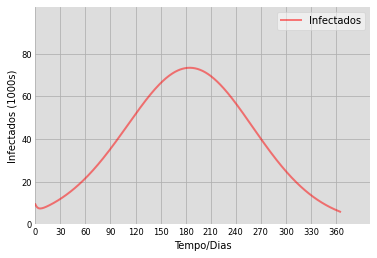

In [28]:
figI3 = plt.figure(facecolor = 'w')
defaultPlot(figI3,1,t,I/tax,'r',"Infectados","Tempo/Dias","Infectados (1000s)"\
            ,0,370,30,0,81,20)
plt.show()

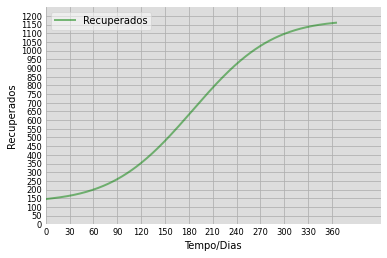

In [29]:
figR3 = plt.figure(facecolor = 'w')
defaultPlot(figR3,1,t,R/tax,'g',"Recuperados","Tempo/Dias","Recuperados"\
            ,0,390,30,0,1201,50)
plt.show()

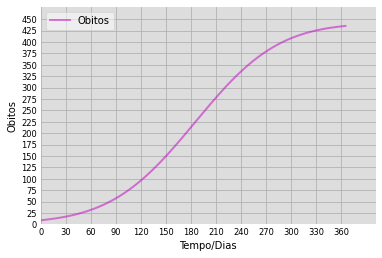

In [30]:
figD3 = plt.figure(facecolor = 'w')
defaultPlot(figD3,1,t,D/tax,'m',"Obitos","Tempo/Dias","Obitos"\
            ,0,370,30,0,451,25)
plt.show()

<p style="text-align: justify">
Com a vacinação a quantidade de casos diminui consideravelmente, sendo o pico da doença 80 mil casos. A quantidade de óbitos se estabilizou em menos de 425 mil (ainda grande mas menos da metade do valor anterior.) e a epidemia se encerra com um valor em torno de 1,5 milhões de casos.

Analisando este cenário e comparando com o cenário de Pernambuco atual, temos que mesmo com a disponibilidade da vacina, se a a taxa de infecção for alta o suficiente, ainda há um grande número de casos e de mortes, mostrando que a melhor medida é a prevenção. Ao implementar testes massivos, distanciamento social e uso de máscaras o objetivo é diminuir o valor de $R_t$ para abaixo de 1, ocasionando a diminuição no número de casos e também da quantidade de internações, que se alto o suficiente aumentaria ainda mais a taxa de mortalidade.
</p>

## Impactos

<p style="text-align: justify">
A epidemia trouxe vários impactos para a sociedade, mudou nosso jeito de trabalhar, de estudar, de se socializar, atingiu a economia e trouxe muita tristeza as famílias que foram atingidas. Muitos destes impactos poderiam ter sido impedidos, através de tomadas de decisão mais rápida dos orgãos governantes, e da conscientização da população sobre a gravidade da doença. Porém é impossível mudar o passado, contudo é necessário aprendermos com estes erros para que no futuro a história não se repita.
</p>

In [31]:
#Fecha as figuras
plt.close(figE)
plt.close(figD)
plt.close(figI)
plt.close(figR)
plt.close(fig)
plt.close(figE2)
plt.close(figD2)
plt.close(figI2)
plt.close(figR2)
plt.close(fig2)
plt.close(figE3)
plt.close(figD3)
plt.close(figI3)
plt.close(figR3)
plt.close(fig3)



# Conclusão

<p style="text-align: justify">
O Coronavírus apresenta diversas características que um modelo simples como o SEIRD não consegue avaliá-las, porém ainda assim ele é muito útil para visualizar a progressão da doença, mesmo com a dificuldade de se conseguir dados precisos que condizem fielmente com a realidade. A partir dos dados analisados verifica-se que mesmo com o número de casos tendo diminuido drasticamente, a prevenção permanece sendo necessária pois os valores podem ser modificado, e o perigo ainda não passou.


Neste Projeto foi possível analisar os dados desde o começo da pandemia em Pernambuco, até os dias atuais, e a partir deles e de um sistema de equações diferenciais, analisar como seria o futuro caso os valores iniciais permaneçam os mesmos.

Cenários Hipotéticos foram análisados e a partir destes foi possível aprender a importância das medidas de prevenção que foram tomadas e entender melhor a gravidade da Doença.

Este trabalho foi de grande valia para compreender-se o úso prático de equações diferenciais e para conhecer melhor como uma Epidemia evolui.
</p>

# Referências Bibliográficas

<div style="text-align: justify">

BATISTA, Milan, **Estimation of the final size of the coronavirus epidemic by the SIR model**. Research Gate, 2020 

<br/>

SINGH, Amresh K.,**Applying the basic SIR model to understand the outbreak of COVID-19**, Department of Computer Science Maharaja Ganga Singh University Bikaner Rajasthan (India), 2020

<br/>

TRAWICKI,Marek B. , **Deterministic Seirs Epidemic Model for Modeling Vital Dynamics, Vaccinations, and Temporary Immunity**. Department of Mathematics, University of Wisconsin-Madison, 2020

<br/>

Comitê Científico-NE, **Comitê Científico-NE atualiza a situação da COVID-19 em todos os Estados do Nordeste, alerta para possível segunda onda caso medidas de flexibilização sejam exageradas e recomenda alerta com visitantes provenientes da Europa**,2020 [Internet], Disponível em: < https://drive.google.com/file/d/1ruiChwvMwr4EnwIod8LkCjknPLwfnXG3/view >, Acesso em 10/11/ 2020

<br>

IBGE - **Instituto Brasileiro de Geografia e Estátistica**, 2020 [Internet],Disponível em: < https://www.ibge.gov.br/cidades-e-estados/pe.html >, Acesso em: 10/11/ 2020

<br/>

COVID-19 ANALYTICS - **Número Efetivo de Reprodução 04 de novembro de 2020** - 2020 [Internet], Disponível em: < https://covid19analytics.com.br/reproducoes/numero-efetivo-de-reproducao-04-de-novembro-de-2020-2/>, Acesso em 10/11/ 2020

<br/>

SECRETARIA DE SAÚDE - **Pernambuco Contra o Coronavírus**, 2020 [Internet] Disponível em: < https://www.pecontracoronavirus.pe.gov.br/ >, Acesso em: 03/11/ 2020

<br/>

Coronavírus Brasil - **Painel Coronavírus**, 2020 [Internet], Disponível em: < https://covid.saude.gov.br/ >, Acesso em: 10/11/ 2020

<br/>

OPAS - **Organização Pan-Americana da Saúde**, 2020 [Internet], Disponível em: < https://www.paho.org/pt/covid19 > , Acesso em: 09/11/ 20

<br/>

IRRD - **COVID-19 em tempo real**, 2020 [Internet], Disponível em: https://www.< irrd.org/covid-19/ >, Acesso em: 03/11/20

<br/>

IRRD - **Modelo Compartimental SEIR**, 2020 [Internet], Disponível em: < https://www.irrd.org/covid-19/calculadora-epidemica/ >, Acesso em: 03/11/ 2020

<br/>

G1 - **Taxa de transmissão da Covid-19 fica abaixo de 1 pela quinta semana seguida no Brasil, aponta Imperial College**, 2020 [Internet], Disponível em: < https://g1.globo.com/bemestar/coronavirus/noticia/2020/10/27/taxa-de-transmissao-da-covid-19-fica-abaixo-de-1-pela-quinta-semana-seguida-no-brasil-aponta-imperial-college.ghtml >, Acesso em: 05/11/ 2020

<br/>

SANTOS, Maria Carolina - Marco Zero - **Quando acabará a epidemia do coronavírus em Pernambuco?**, 2020 [Internet], Disponível em: < https://marcozero.org/quando-acabara-a-epidemia-do-coronavirus-em-pernambuco/ >, Acesso em: 01/11/ 2020

<br/>

FLAVIODF - **Estimativas de R(t) por Estados do Brasil**, 2020  [Internet],Disponível em: < https://flaviovdf.github.io/covid19/ >, Acesso em: 05/11/ 2020

<br/>

GOH, Gabriel - **Epidemic Calculator**,2020 [Internet], Disponível em: < https://gabgoh.github.io/COVID/index.html >, Acesso em: 01/11/ 2020

<br/>

MEIRELES, Marina - G1 PE - **Dois primeiros casos do novo coronavírus são confirmados em PE, diz Secretaria de Saúde**, 2020 [Internet],
Disponível em: < https://g1.globo.com/pe/pernambuco/noticia/2020/03/12/primeiros-casos-de-coronavirus-sao-confirmados-pela-secretaria-de-saude-de-pernambuco.ghtml >, Acesso em: 01/11/ 2020

<br/>

COMITÊ CIENTÍFICO DE COMBATE  AO CORONA VÍRUS - **Taxa de variação de casos por região de saúde**, 2020 [Internet], Disponível em: < https://www.comitecientifico-ne.com.br/ >, Acesso em: 10/11/ 2020

<br/>

GALLAGHER, James - BBC News - **Coronavírus: quanto tempo uma pessoa leva para se recuperar da covid-19**, 2020 [Internet], Disponível em: < https://www.bbc.com/portuguese/geral-52274791 >, Acesso em: 03/11/ 2020

<br/>

WORLDOMETER - **COVID-19 Coronavirus Pandemic**, 2020 [Internet] Disponível em < https://www.worldometers.info/coronavirus/ >, Acesso em: 03/11/ 2020

<br/>

WORLD HEALTH ORGANIZATION - **Coronavirus disease (COVID-19) pandemic**, Disponível em: < https://www.who.int/emergencies/diseases/novel-coronavirus-2019?gclid=CjwKCAiAkan9BRAqEiwAP9X6USgz_2oAveCu1TVd5wEa0ptzxZ7aYc_SqLbp48bJ_aFts3BVhG7f8hoCTikQAvD_BwE >, Acesso em 10/11/ 2020

<div/>